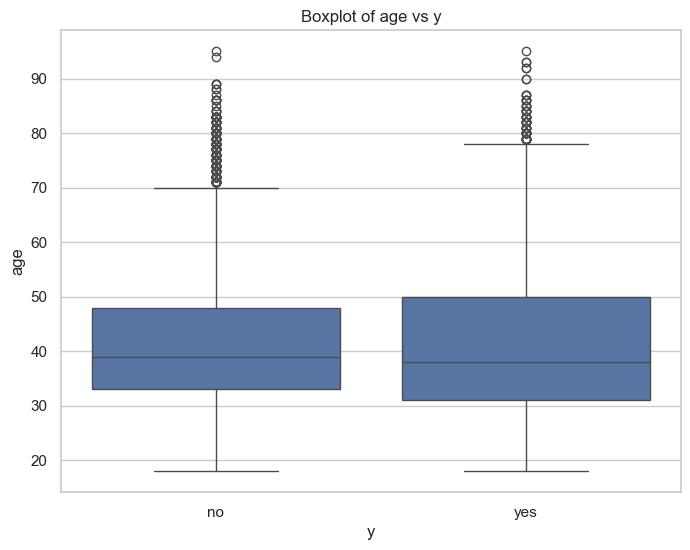

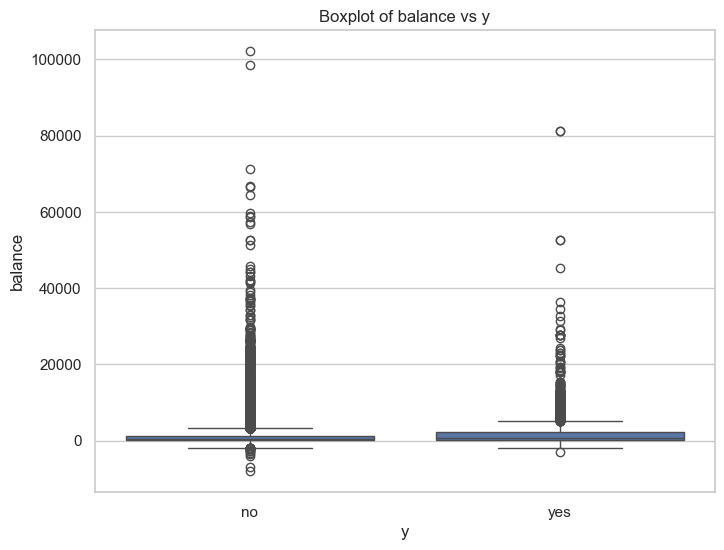

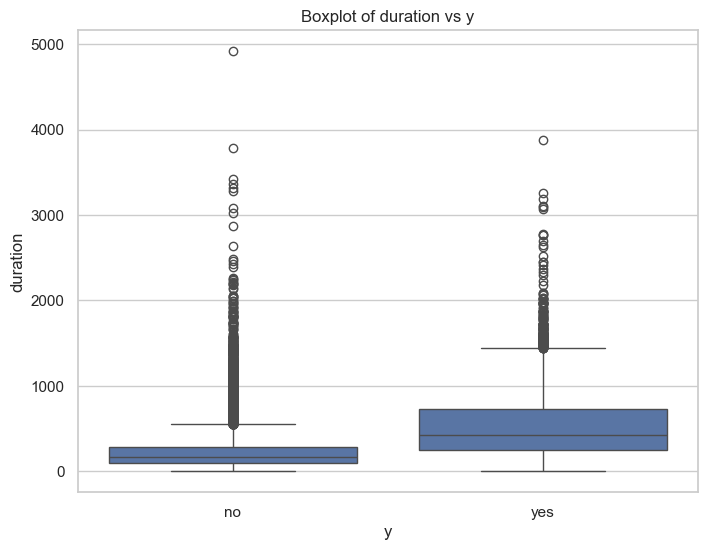

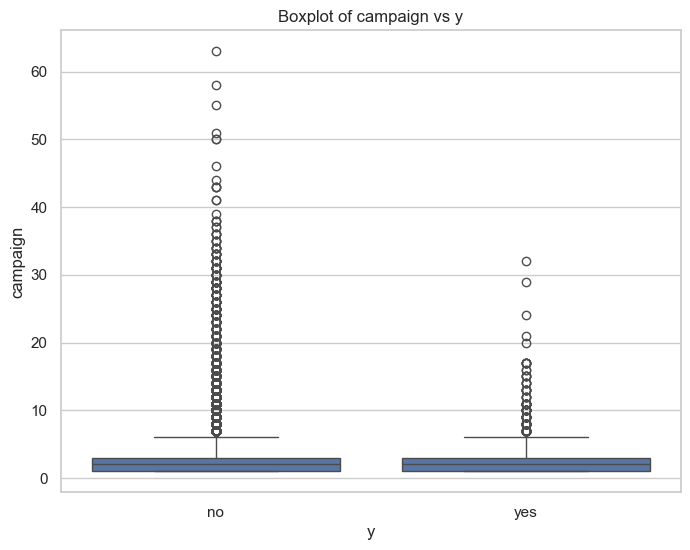

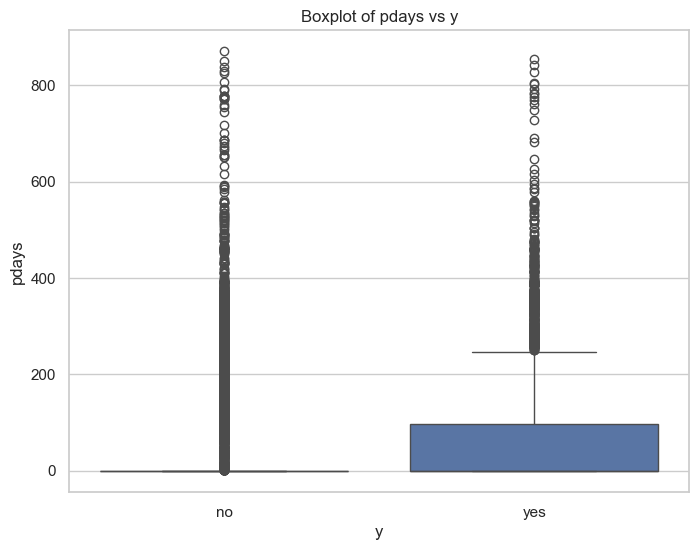

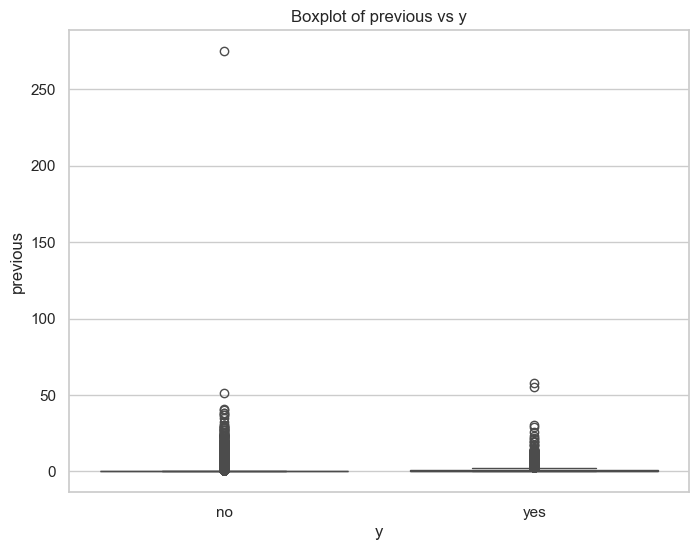

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the scaled dataset
data = pd.read_csv('bank-full.csv', sep=';')  # Replace with the path to your scaled dataset

# Replace 'y' with the actual name of the target column
target_column = 'y'  # Update this if the column name is different

numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for col in numerical_columns:
    if target_column in data.columns and col in data.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=target_column, y=col, data=data)
        plt.title(f'Boxplot of {col} vs {target_column}')
        plt.xlabel(target_column)
        plt.ylabel(col)
        plt.show()
    else:
        print(f"Column '{col}' or '{target_column}' not found in the dataset.")



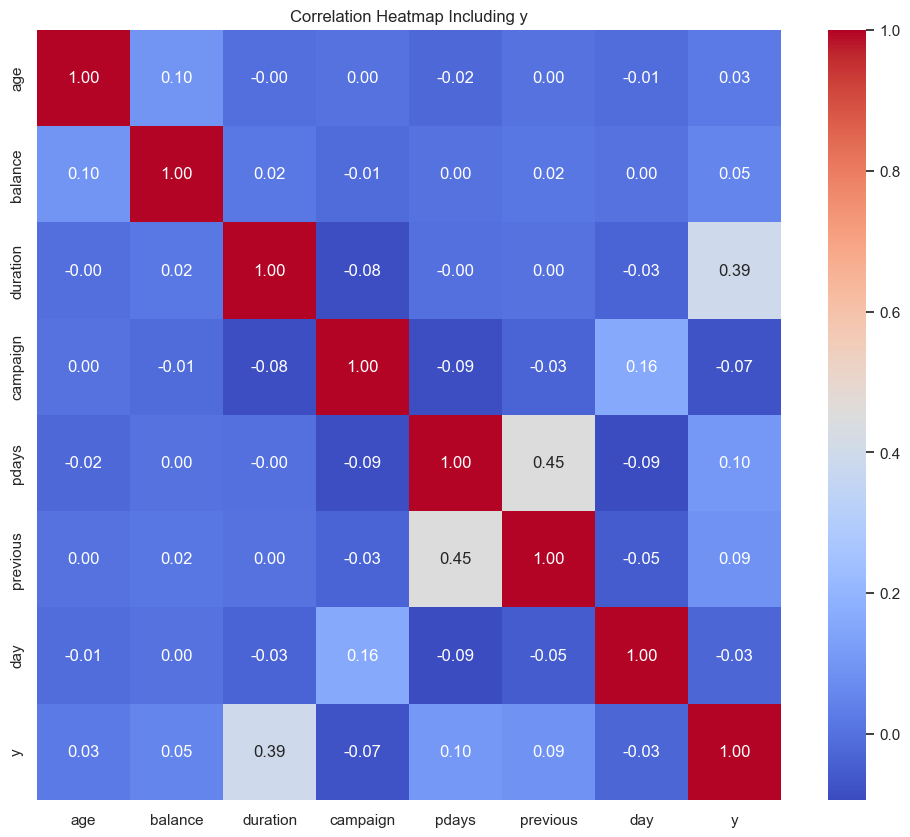

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the scaled dataset
data = pd.read_csv('bank-full.csv', sep=';')  # Replace with the path to your scaled dataset

# List of numerical columns
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day']

# Target column
target_column = 'y'

if target_column in data.columns:
    # Encode the target column if it's categorical
    if data[target_column].dtype == 'object':
        data[target_column] = data[target_column].map({'yes': 1, 'no': 0})

    # Check if numerical columns exist in the dataset
    existing_columns = [col for col in numerical_columns if col in data.columns]

    if existing_columns:
        # Include the target column in the correlation calculation
        columns_to_analyze = existing_columns + [target_column]
        
        # Calculate the correlation matrix
        correlation_matrix = data[columns_to_analyze].corr()
        
        # Plot the heatmap
        plt.figure(figsize=(12, 10))
        sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
        plt.title(f'Correlation Heatmap Including {target_column}')
        plt.show()
    else:
        print("None of the specified numerical columns are found in the dataset.")
else:
    print(f"Target column '{target_column}' not found in the dataset.")


In [29]:
# checking whether all rows in every column of the dataset have the same value

for column in data.columns:
    if data[column].nunique() == 1:
        print(f"All rows in the column '{column}' have the same value: {data[column].iloc[0]}")
    else:
        print(f"The column '{column}' has {data[column].nunique()} unique values.")


The column 'age' has 77 unique values.
The column 'job' has 12 unique values.
The column 'marital' has 3 unique values.
The column 'education' has 4 unique values.
The column 'default' has 2 unique values.
The column 'balance' has 7168 unique values.
The column 'housing' has 2 unique values.
The column 'loan' has 2 unique values.
The column 'contact' has 3 unique values.
The column 'day' has 31 unique values.
The column 'month' has 12 unique values.
The column 'duration' has 1573 unique values.
The column 'campaign' has 48 unique values.
The column 'pdays' has 559 unique values.
The column 'previous' has 41 unique values.
The column 'poutcome' has 4 unique values.
The column 'y' has 2 unique values.


In [59]:
# Drop the Low relevant columns


columns_to_drop = ['day', 'month','age']
data_dropped_column = data.drop(columns=columns_to_drop)

# Display the DataFrame after dropping columns
print("\nDataFrame after dropping columns:")
print(data_dropped_column)

output_file = "data_dropped_column.csv"
data_dropped_column.to_csv(output_file, index=False)

print(f"\nDataFrame has been saved to {output_file}")





DataFrame after dropping columns:
                job   marital  education default  balance housing loan  \
0        management   married   tertiary      no     2143     yes   no   
1        technician    single  secondary      no       29     yes   no   
2      entrepreneur   married  secondary      no        2     yes  yes   
3       blue-collar   married    unknown      no     1506     yes   no   
4           unknown    single    unknown      no        1      no   no   
...             ...       ...        ...     ...      ...     ...  ...   
45206    technician   married   tertiary      no      825      no   no   
45207       retired  divorced    primary      no     1729      no   no   
45208       retired   married  secondary      no     5715      no   no   
45209   blue-collar   married  secondary      no      668      no   no   
45210  entrepreneur   married  secondary      no     2971      no   no   

         contact  duration  campaign  pdays  previous poutcome  y  
0       

In [60]:
# Checking Null values in column and Raws

print("\nNull values in each column:")
print(data_dropped_column.isnull().sum())

# Check for rows with any null values
print("\nRows with any null values:")
print(data_dropped_column.isnull().any(axis=1))

# Check total null values in the DataFrame
print("\nTotal null values in the DataFrame:")
print(data_dropped_column.isnull().sum().sum())




Null values in each column:
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Rows with any null values:
0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

Total null values in the DataFrame:
0


C:\Users\hp\AppData\Local\Temp\ipykernel_27276\3617169773.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True: 1, False: 0})


Transformed dataset has been saved to encoded_data.csv
   education  default  balance  housing  loan  duration  campaign  pdays  \
0          2        0     2143        1     0       261         1     -1   
1          1        0       29        1     0       151         1     -1   
2          1        0        2        1     1        76         1     -1   
3          3        0     1506        1     0        92         1     -1   
4          3        0        1        0     0       198         1     -1   

   previous  y  ...  job_technician  job_unemployed  job_unknown  \
0         0  0  ...               0               0            0   
1         0  0  ...               1               0            0   
2         0  0  ...               0               0            0   
3         0  0  ...               0               0            0   
4         0  0  ...               0               0            1   

   marital_married  marital_single  contact_telephone  contact_unknown  \
0    

C:\Users\hp\AppData\Local\Temp\ipykernel_27276\3617169773.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=feature, data=data, palette="coolwarm")


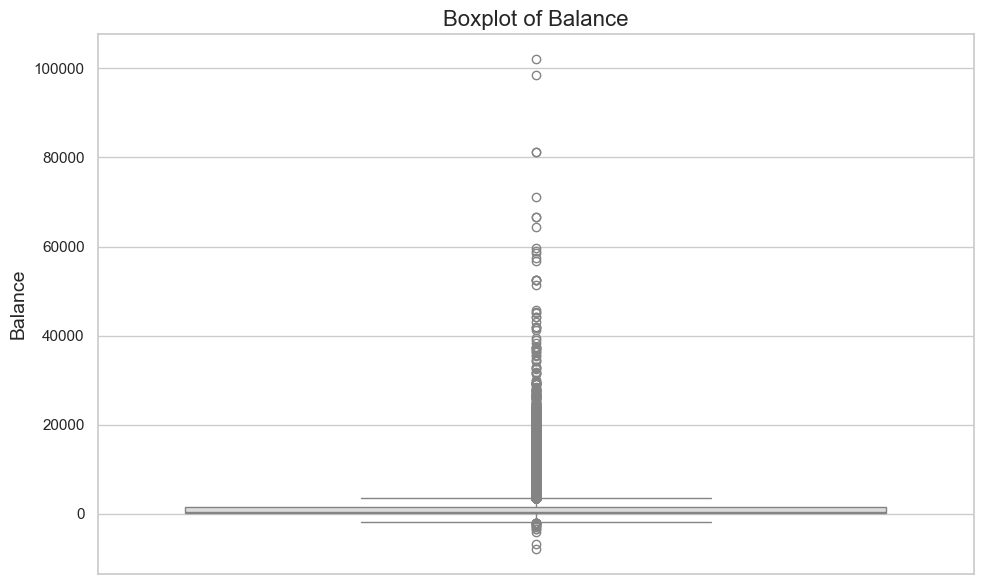

C:\Users\hp\AppData\Local\Temp\ipykernel_27276\3617169773.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=feature, data=data, palette="coolwarm")


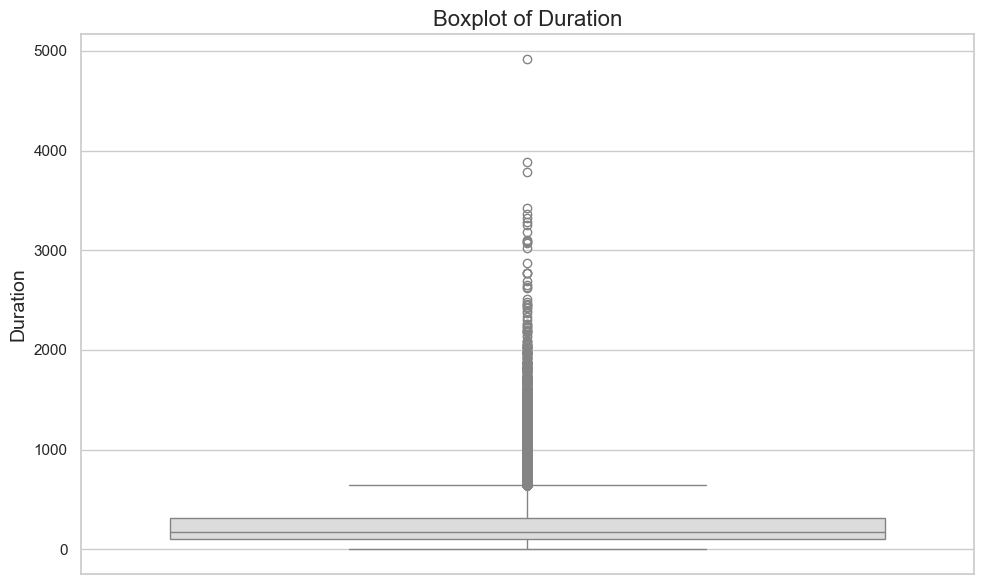

C:\Users\hp\AppData\Local\Temp\ipykernel_27276\3617169773.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=feature, data=data, palette="coolwarm")


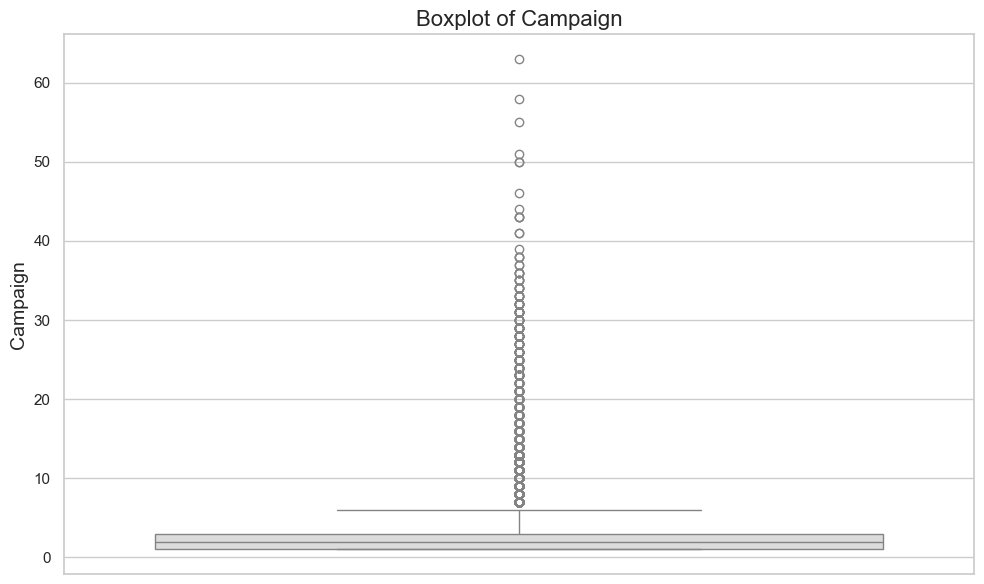

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_csv("data_dropped_column.csv")  # Replace with the correct path if necessary

# Columns to one-hot encode
one_hot_columns = ['job', 'marital', 'contact', 'poutcome']

# Apply one-hot encoding
for column in one_hot_columns:
    if column in data.columns:
        data = pd.get_dummies(data, columns=[column], drop_first=True)

# Columns to label encode
label_encode_columns = ['education', 'default', 'housing', 'loan', 'y']

# Apply label encoding
label_encoder = LabelEncoder()
for col in label_encode_columns:
    if col in data.columns:
        data[col] = label_encoder.fit_transform(data[col])

# Convert TRUE/FALSE to 1/0
data = data.replace({True: 1, False: 0})

# Save the transformed dataset
output_file = "encoded_data.csv"
data.to_csv(output_file, index=False)
print(f"Transformed dataset has been saved to {output_file}")
print(data.head())

# Set the plot style
sns.set_theme(style="whitegrid")

# 1. Visualizing one-hot encoded columns
# Select a subset of one-hot encoded columns for clarity



# 5. Boxplot for numerical variables
numerical_features = ['age', 'balance', 'duration', 'campaign']
for feature in numerical_features:
    if feature in data.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(y=feature, data=data, palette="coolwarm")
        plt.title(f"Boxplot of {feature.capitalize()}", fontsize=16)
        plt.ylabel(feature.capitalize(), fontsize=14)
        plt.tight_layout()
        plt.show()




In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dropped-column dataset
data = pd.read_csv("encoded_data.csv")

# Identify numerical columns for scaling
numerical_columns = [ 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling
original_data = data[numerical_columns].copy()  # Keep a copy of the original data for comparison
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the scaled DataFrame
print("\nScaled DataFrame:")
print(data.head())

# Save the scaled dataset to a new CSV file
output_file = "scaled_data.csv"
data.to_csv(output_file, index=False)
print(f"\nScaled dataset has been saved to {output_file}")





Scaled DataFrame:
   education  default   balance  housing  loan  duration  campaign     pdays  \
0          2        0  0.256419        1     0  0.011016 -0.569351 -0.411453   
1          1        0 -0.437895        1     0 -0.416127 -0.569351 -0.411453   
2          1        0 -0.446762        1     1 -0.707361 -0.569351 -0.411453   
3          3        0  0.047205        1     0 -0.645231 -0.569351 -0.411453   
4          3        0 -0.447091        0     0 -0.233620 -0.569351 -0.411453   

   previous  y  ...  job_technician  job_unemployed  job_unknown  \
0  -0.25194  0  ...               0               0            0   
1  -0.25194  0  ...               1               0            0   
2  -0.25194  0  ...               0               0            0   
3  -0.25194  0  ...               0               0            0   
4  -0.25194  0  ...               0               0            1   

   marital_married  marital_single  contact_telephone  contact_unknown  \
0                

In [63]:
# Split Data into Training and Test Sets

import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data from a CSV file
data = pd.read_csv('scaled_data.csv')  # Replace with the path to your CSV file

# Separate features (X) and target (y)
X = data.drop('y', axis=1)  # Features
y = data['y']               # Target (label)

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (36168, 27)
Testing set size: (9043, 27)


In [64]:

#  Train Neural Network

import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Scale the features for neural network input
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Use softmax if multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Use categorical_crossentropy for multi-class

# Train the model with validation data
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# Print validation loss and accuracy after training
print(f"Final Validation Loss: {history.history['val_loss'][-1]}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1] * 100:.2f}%")

# Evaluate the model on the test data
y_pred_nn = model.predict(X_test_scaled)
y_pred_nn = (y_pred_nn > 0.5).astype(int)  # Convert to binary class if needed

# Evaluate accuracy
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"Test Accuracy: {accuracy_nn * 100:.2f}%")


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8797 - loss: 0.2997 - val_accuracy: 0.8978 - val_loss: 0.2419
Epoch 2/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8991 - loss: 0.2350 - val_accuracy: 0.8986 - val_loss: 0.2400
Epoch 3/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9030 - loss: 0.2293 - val_accuracy: 0.8975 - val_loss: 0.2386
Epoch 4/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9037 - loss: 0.2294 - val_accuracy: 0.8954 - val_loss: 0.2389
Epoch 5/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9034 - loss: 0.2239 - val_accuracy: 0.8975 - val_loss: 0.2392
Epoch 6/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9038 - loss: 0.2222 - val_accuracy: 0.8983 - val_loss: 0.2373
Epoch 7/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9028 - loss: 0.2255 - val_accuracy: 0.8987 - val_loss: 0.2381
Epoch 8/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9059 - loss: 0.2230 - 

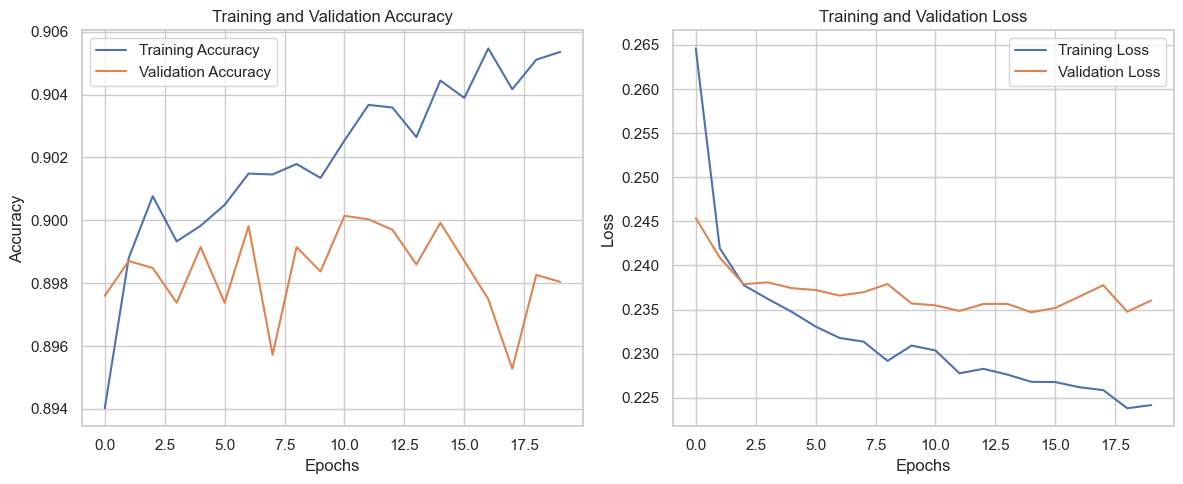

In [68]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()


In [69]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping

# Scale the features for neural network input
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model with regularization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.2),  # Add dropout to reduce overfitting
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Use softmax if multi-class classification
])

# Compile the model with adjusted learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Introduce Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with more epochs and early stopping
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, 
                    validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

# Print validation loss and accuracy after training
print(f"Final Validation Loss: {history.history['val_loss'][-1]}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1] * 100:.2f}%")

# Evaluate the model on the test data
y_pred_nn = model.predict(X_test_scaled)
y_pred_nn = (y_pred_nn > 0.5).astype(int)  # Convert to binary class if needed

# Evaluate accuracy
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"Test Accuracy: {accuracy_nn * 100:.2f}%")


Epoch 1/50


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2261/2261 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8817 - loss: 0.2959 - val_accuracy: 0.8970 - val_loss: 0.2444
Epoch 2/50
2261/2261 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9001 - loss: 0.2404 - val_accuracy: 0.8977 - val_loss: 0.2397
Epoch 3/50
2261/2261 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8994 - loss: 0.2393 - val_accuracy: 0.8980 - val_loss: 0.2389
Epoch 4/50
2261/2261 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9016 - loss: 0.2338 - val_accuracy: 0.8979 - val_loss: 0.2382
Epoch 5/50
2261/2261 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9042 - loss: 0.2282 - val_accuracy: 0.8990 - val_loss: 0.2381
Epoch 6/50
2261/2261 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9000 - loss: 0.2355 - val_accuracy: 0.8995 - val_loss: 0.2376
Epoch 7/50
2261/2261 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9020 - loss: 0.2309 - val_accuracy: 0.8985 - val_loss: 0.2380
Epoch 8/50
2261/2261 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9010 - loss: 0.2308 - val_accura

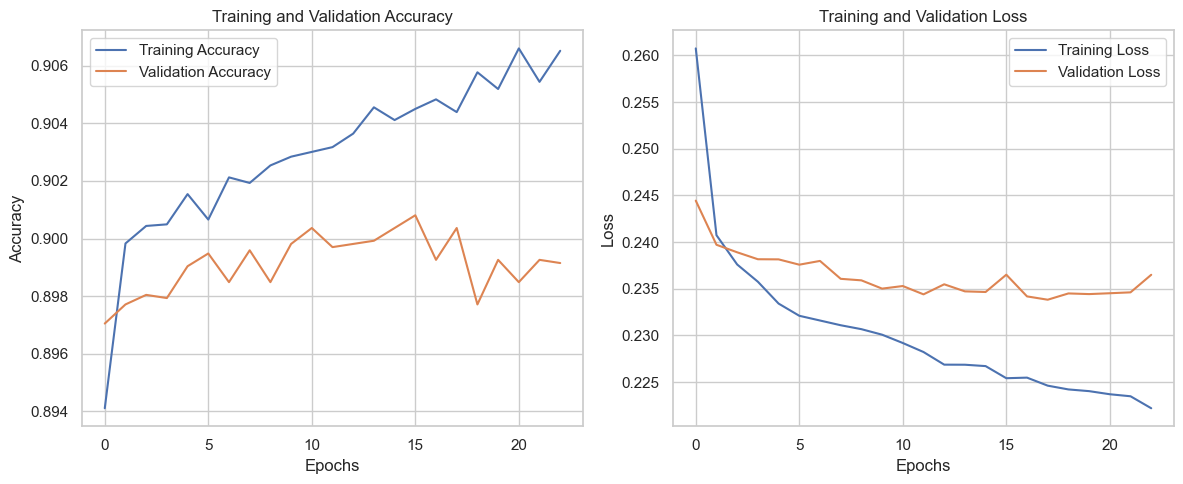

In [70]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()


In [67]:
# Train Random Forest

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Scale the features for neural network input (optional for Random Forest, but helps if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores and the mean score
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")

# Train the model on the full training data
rf_model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Test Accuracy: {accuracy_rf * 100:.2f}%")

# Optionally, you can also print other metrics like confusion matrix, classification report, etc.
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Cross-Validation Accuracy Scores: [0.89535527 0.89742881 0.89521703 0.89769114 0.89713812]
Mean Cross-Validation Accuracy: 89.66%
Test Accuracy: 89.59%
Confusion Matrix:
[[7688  264]
 [ 677  414]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.61      0.38      0.47      1091

    accuracy                           0.90      9043
   macro avg       0.76      0.67      0.71      9043
weighted avg       0.88      0.90      0.89      9043



In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# Initialize Random Forest Classifier with class weights
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')

# Print the cross-validation scores and the mean score
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")

# Train the model on the balanced dataset
rf_model.fit(X_train_balanced, y_train_balanced)

# Evaluate the model on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate accuracy and other metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Test Accuracy: {accuracy_rf * 100:.2f}%")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


ImportError: cannot import name 'validate_data' from 'sklearn.utils.validation' (c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py)